# Basic Fixed point Math Operation using CMSIS DSP library

This file includes add, subtract, divide, shift, multiply operation for fixed point using CMSIS DSP libary which supported PyWrapper for Fixed point.

Other parts such as Fourier Transform, Amplitude in Frequency Domain, Windowing are in below 2 links,

- Twitter: https://twitter.com/arduino/status/1436339582665121801?cxt=HHwWkoCzmbHP8-4nAAAA

- Explanation: https://towardsdatascience.com/fixed-point-dsp-for-data-scientists-d773a4271f7f

- ipynb: https://github.com/ArmDeveloperEcosystem/fixed-point-dsp-for-data-scientists/blob/main/fixed_point_dsp_for_data_scientists.ipynb

- ipynb uploaded in google: https://colab.research.google.com/github/ArmDeveloperEcosystem/fixed-point-dsp-for-data-scientists/blob/main/fixed_point_dsp_for_data_scientists.ipynb


## Function Reference
- CMSIS DSP: https://github.com/ARM-software/CMSIS-DSP

- https://arm-software.github.io/CMSIS-DSP/main/index.html

- basic_math_function.h

- fast_math_function.h

## PyWrapper file in source code
- cmsisdsp_basic.c

- cmsisdsp_fastmath.c

In [50]:
import cmsisdsp
import librosa
import resampy
import numpy as np
import matplotlib.pyplot as plt

In [51]:
length = 2
audio_sample_rate = 16000

audio_samples, sample_rate = librosa.load(librosa.ex("trumpet"))
audio_samples = resampy.resample(audio_samples, sample_rate, audio_sample_rate)
audio_samples = audio_samples[:length*audio_sample_rate]
print(f"Successfully read {len(audio_samples)} samples from trumpet in librosa example with sample rate of {audio_sample_rate}")

Successfully read 32000 samples from trumpet in librosa example with sample rate of 16000


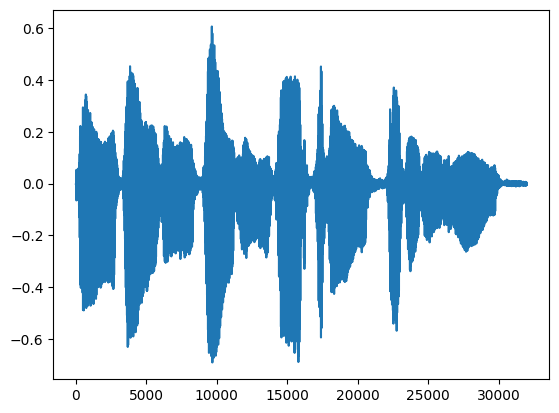

In [52]:
plt.plot(audio_samples)

In [53]:
samples = audio_samples[:audio_sample_rate]
sample_q7 = cmsisdsp.arm_float_to_q7(samples)
sample_q15 = cmsisdsp.arm_float_to_q15(samples)
sample_q31 = cmsisdsp.arm_float_to_q31(samples)

In [54]:
sample_q7.dtype, sample_q15.dtype, sample_q31.dtype

(dtype('int8'), dtype('int16'), dtype('int32'))

In [55]:
# shift
shift_sample_q7 = cmsisdsp.arm_shift_q7(sample_q7, 1)
shift_sample_q15 = cmsisdsp.arm_shift_q15(sample_q15, 1)
shift_sample_q31 = cmsisdsp.arm_shift_q31(sample_q31, 1)
shift_sample = samples*2

# add
add_sample_q7 = cmsisdsp.arm_add_q7(sample_q7, sample_q7)
add_sample_q15 = cmsisdsp.arm_add_q15(sample_q15, sample_q15)
add_sample_q31 = cmsisdsp.arm_add_q31(sample_q31, sample_q31)
add_sample = samples + samples

# subtract
sub_sample_q7 = cmsisdsp.arm_sub_q7(sample_q7, sample_q7)
sub_sample_q15 = cmsisdsp.arm_sub_q15(sample_q15, sample_q15)
sub_sample_q31 = cmsisdsp.arm_sub_q31(sample_q31, sample_q31)
sub_sample = samples - samples

# multiply
mult_sample_q7 = cmsisdsp.arm_mult_q7(sample_q7, sample_q7)
mult_sample_q15 = cmsisdsp.arm_mult_q15(sample_q15, sample_q15)
mult_sample_q31 = cmsisdsp.arm_mult_q31(sample_q31, sample_q31)
mult_sample = samples * samples

# [TODO TEST] divide

# Q7 Not implemented
# ret_q7, divide_sample_q7, shift_q7 = cmsisdsp.arm_divide_q7(sample_q7[0], sample_q7[0]) 
# divide_sample_q7 = np.array([divide_sample_q7, ], dtype=sample_q7.dtype)

ret_q15_divide, divide_sample_q15, shift_q15_divide = cmsisdsp.arm_divide_q15(sample_q15[0], sample_q15[0]) 
divide_sample_q15 = np.array([divide_sample_q15, ], dtype=sample_q15.dtype)

ret_q31_divide, divide_sample_q31, shift_q31_divide = cmsisdsp.arm_divide_q31(sample_q31[0], sample_q31[0])
divide_sample_q31 = np.array([divide_sample_q31, ], dtype=sample_q31.dtype)

divide_sample = samples[0] / samples[0]

# sqrt
# ret_q7, sqrt_sample_q7, shift_q7 = cmsisdsp.arm_sqrt_q7(sample_q7[1]) # Not implemented
ret_q15_sqrt, sqrt_sample_q15 = cmsisdsp.arm_sqrt_q15(sample_q15[6]) # sample[0] is negative
sqrt_sample_q15 = np.array([sqrt_sample_q15, ], dtype=sample_q15.dtype)

ret_q31_sqrt, sqrt_sample_q31 = cmsisdsp.arm_sqrt_q31(sample_q31[6])
sqrt_sample_q31 = np.array([sqrt_sample_q31, ], dtype=sample_q31.dtype)

sqrt_sample = np.sqrt(samples[6])

# absolute
abs_sample_q7 = cmsisdsp.arm_abs_q7(sample_q7)
abs_sample_q15 = cmsisdsp.arm_abs_q15(sample_q15)
abs_sample_q31 = cmsisdsp.arm_abs_q31(sample_q31)
abs_sample = np.abs(samples)

# cosine
# cos_sample_q7 = cmsisdsp.arm_cos_q7(sample_q7[0]) # Not implemented
# cos_sample_q7 = np.array([cos_sample_q7, ], dtype=sample_q7.dtype)

cos_sample_q15 = cmsisdsp.arm_cos_q15(sample_q15[0])
cos_sample_q15 = np.array([cos_sample_q15, ], dtype=sample_q15.dtype)

cos_sample_q31 = cmsisdsp.arm_cos_q31(sample_q31[0])
cos_sample_q31 = np.array([cos_sample_q31, ], dtype=sample_q31.dtype)

cos_sample = np.cos(samples[0])

Q7  0.2221477
Q15  0.21436572
Q31  0.2143352


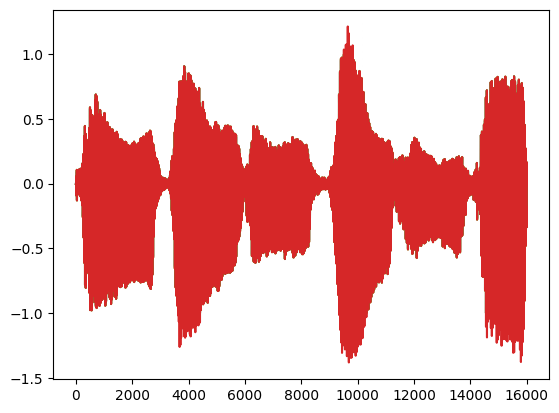

In [56]:
# shift
print("Q7 ", np.max(shift_sample-cmsisdsp.arm_q7_to_float(shift_sample_q7)))
print("Q15 ", np.max(shift_sample-cmsisdsp.arm_q15_to_float(shift_sample_q15)))
print("Q31 ", np.max(shift_sample-cmsisdsp.arm_q31_to_float(shift_sample_q31)))

plt.plot(cmsisdsp.arm_q7_to_float(shift_sample_q7))
plt.plot(cmsisdsp.arm_q15_to_float(shift_sample_q15))
plt.plot(cmsisdsp.arm_q31_to_float(shift_sample_q31))
plt.plot(shift_sample)

Q7  0.2221477
Q15  0.21436572
Q31  0.2143352


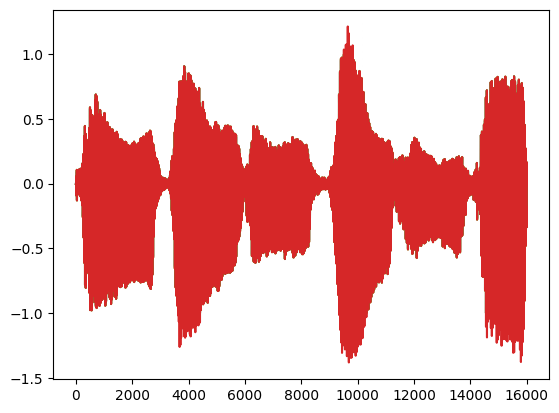

In [57]:
# add
print("Q7 ", np.max(add_sample-cmsisdsp.arm_q7_to_float(add_sample_q7)))
print("Q15 ", np.max(add_sample-cmsisdsp.arm_q15_to_float(add_sample_q15)))
print("Q31 ", np.max(add_sample-cmsisdsp.arm_q31_to_float(add_sample_q31)))

plt.plot(cmsisdsp.arm_q7_to_float(add_sample_q7))
plt.plot(cmsisdsp.arm_q15_to_float(add_sample_q15))
plt.plot(cmsisdsp.arm_q31_to_float(add_sample_q31))
plt.plot(add_sample)


Q7  0.0
Q15  0.0
Q31  0.0


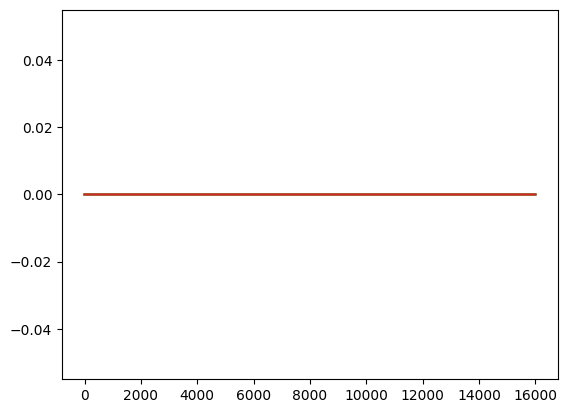

In [58]:
# subtract
print("Q7 ", np.max(sub_sample-cmsisdsp.arm_q7_to_float(sub_sample_q7)))
print("Q15 ", np.max(sub_sample-cmsisdsp.arm_q15_to_float(sub_sample_q15)))
print("Q31 ", np.max(sub_sample-cmsisdsp.arm_q31_to_float(sub_sample_q31)))

plt.plot(cmsisdsp.arm_q7_to_float(sub_sample_q7))
plt.plot(cmsisdsp.arm_q15_to_float(sub_sample_q15))
plt.plot(cmsisdsp.arm_q31_to_float(sub_sample_q31))
plt.plot(sub_sample)


Q7  0.016149849
Q15  6.2704086e-05
Q31  2.9802322e-08


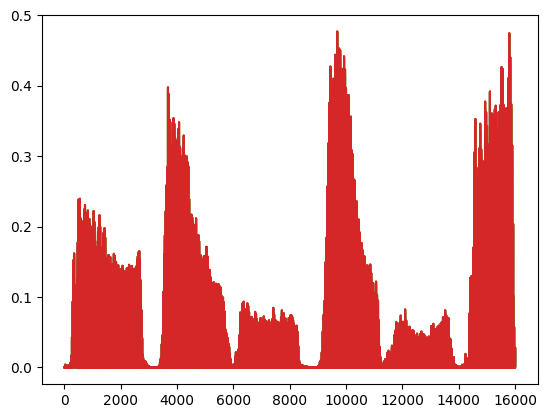

In [59]:
# multiply
print("Q7 ", np.max(mult_sample-cmsisdsp.arm_q7_to_float(mult_sample_q7)))
print("Q15 ", np.max(mult_sample-cmsisdsp.arm_q15_to_float(mult_sample_q15)))
print("Q31 ", np.max(mult_sample-cmsisdsp.arm_q31_to_float(mult_sample_q31)))

plt.plot(cmsisdsp.arm_q7_to_float(mult_sample_q7))
plt.plot(cmsisdsp.arm_q15_to_float(mult_sample_q15))
plt.plot(cmsisdsp.arm_q31_to_float(mult_sample_q31))
plt.plot(mult_sample)


In [60]:
# divide
print(ret_q15_divide, divide_sample_q15, shift_q15_divide)
print(ret_q31_divide, divide_sample_q31, shift_q31_divide)

# print("Q7 ", np.max(divide_sample-cmsisdsp.arm_q7_to_float(divide_sample_q7)))
print("Q15 ", cmsisdsp.arm_q15_to_float(divide_sample_q15)*2**(shift_q15_divide))
print("Q31 ", cmsisdsp.arm_q31_to_float(divide_sample_q31)*2**(shift_q31_divide))
print("Numpy ", divide_sample)


0 [16384] 1
0 [1073741824] 1
Q15  [1.]
Q31  [1.]
Numpy  1.0


In [61]:
# sqrt
print(ret_q15_sqrt, sqrt_sample_q15)
print(ret_q31_sqrt, sqrt_sample_q31)

# print("Q7 ", np.max(sqrt_sample-cmsisdsp.arm_q7_to_float(sqrt_sample_q7)))
print("Q15 ", cmsisdsp.arm_q15_to_float(sqrt_sample_q15))
print("Q31 ", cmsisdsp.arm_q31_to_float(sqrt_sample_q31))
print("Numpy ", sqrt_sample)


0 [923]
0 [61265505]
Q15  [0.02816772]
Q31  [0.02852897]
Numpy  0.02852898


Q7  0.0078124925
Q15  3.0513853e-05
Q31  4.5838533e-10


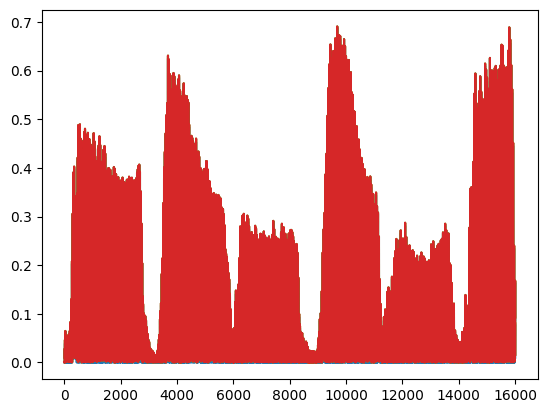

In [62]:
# absolute
print("Q7 ", np.max(abs_sample-cmsisdsp.arm_q7_to_float(abs_sample_q7)))
print("Q15 ", np.max(abs_sample-cmsisdsp.arm_q15_to_float(abs_sample_q15)))
print("Q31 ", np.max(abs_sample-cmsisdsp.arm_q31_to_float(abs_sample_q31)))

plt.plot(cmsisdsp.arm_q7_to_float(abs_sample_q7))
plt.plot(cmsisdsp.arm_q15_to_float(abs_sample_q15))
plt.plot(cmsisdsp.arm_q31_to_float(abs_sample_q31))
plt.plot(abs_sample)

In [63]:
# cosine
print(cos_sample_q15, cos_sample_q31)
# print("Q7 ", np.max(cos_sample-cmsisdsp.arm_q7_to_float(cos_sample_q7)))
print("Q15 ", cmsisdsp.arm_q15_to_float(cos_sample_q15))
print("Q31 ", cmsisdsp.arm_q31_to_float(cos_sample_q31))
print("Numpy", cos_sample)


[32764] [2147408396]
Q15  [0.9998779]
Q31  [0.99996495]
Numpy 0.9999996


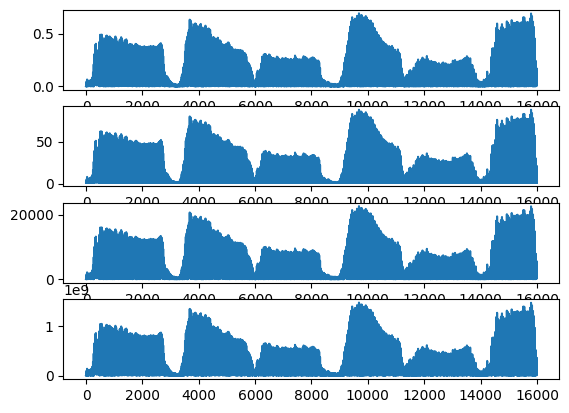

In [64]:
# Q 1.15, Q 1.31

logsamples = samples
logsample_q7 = sample_q7
logsample_q15 = sample_q15
logsample_q31 = sample_q31

logsamples[samples < 0] = - samples[samples < 0]
logsample_q7[sample_q7 < 0] = - sample_q7[sample_q7 < 0]
logsample_q15[sample_q15 < 0] = - sample_q15[sample_q15 < 0]
logsample_q31[sample_q31 < 0] = - sample_q31[sample_q31 < 0]

logsamples[logsamples == 0] = logsamples[logsamples == 0] + np.finfo(np.float32).eps
logsample_q7[logsample_q7 == 0] = logsample_q7[logsample_q7 == 0] +1
logsample_q15[logsample_q15 == 0] = logsample_q15[logsample_q15 == 0] +1
logsample_q31[logsample_q31 == 0] = logsample_q31[logsample_q31 == 0] +1


fig, axes = plt.subplots(nrows=4)

axes[0].plot(logsamples)
axes[1].plot(logsample_q7)
axes[2].plot(logsample_q15)
axes[3].plot(logsample_q31)

In [65]:
# log
# Q 15 -> Q 4.11
# Q 31 -> Q 5.26

result_logsamples = np.log(logsamples)
result_logsample_q15 = cmsisdsp.arm_vlog_q15(logsample_q15)
result_logsample_q31 = cmsisdsp.arm_vlog_q31(logsample_q31)
revert_logsample_q15 = cmsisdsp.arm_q15_to_float(result_logsample_q15) * 2**4
revert_logsample_q31 = cmsisdsp.arm_q31_to_float(result_logsample_q31) * 2**5

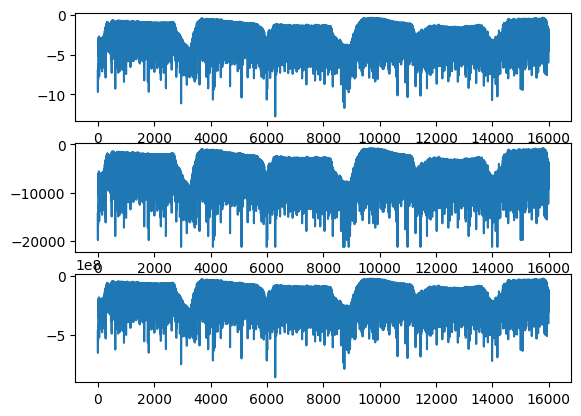

In [66]:
fig, axes = plt.subplots(nrows=3)

axes[0].plot(result_logsamples)
axes[1].plot(result_logsample_q15)
axes[2].plot(result_logsample_q31)

Logarithm result !
	Error Max in Logarithm Q15:  0.6635914
	Error Max in Logarithm Q31:  9.6321106e-05


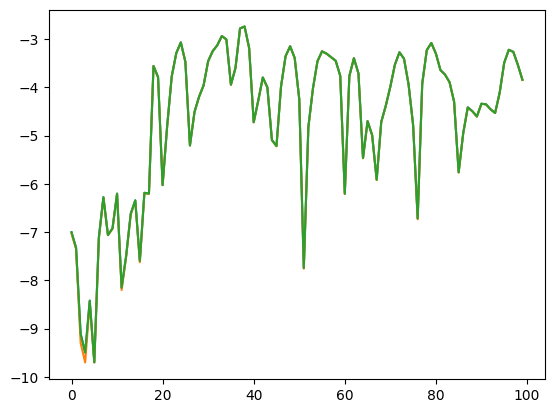

In [67]:
n = 100
print("Logarithm result !")
print("\tError Max in Logarithm Q15: ", np.max(result_logsamples-revert_logsample_q15))
print("\tError Max in Logarithm Q31: ", np.max(result_logsamples-revert_logsample_q31))
plt.plot(result_logsamples[:n])
plt.plot(revert_logsample_q15[:n])
plt.plot(revert_logsample_q31[:n])

In [86]:
sample_q15_q8_8 = sample_q15 >> 4
sample_q31_q8_24 = sample_q31 >> 4

sample_q15_q8_8_revert = cmsisdsp.arm_q15_to_float(sample_q15_q8_8) * 2**7
sample_q31_q8_24_revert = cmsisdsp.arm_q31_to_float(sample_q31_q8_24) * 2**7
sample_q8_24 = samples * 2**7 * 2**-4

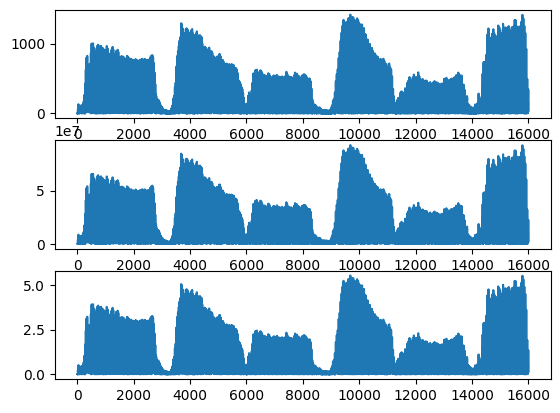

In [88]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
ax0.plot(sample_q15_q8_8)
ax1.plot(sample_q31_q8_24)
ax2.plot(sample_q8_24)

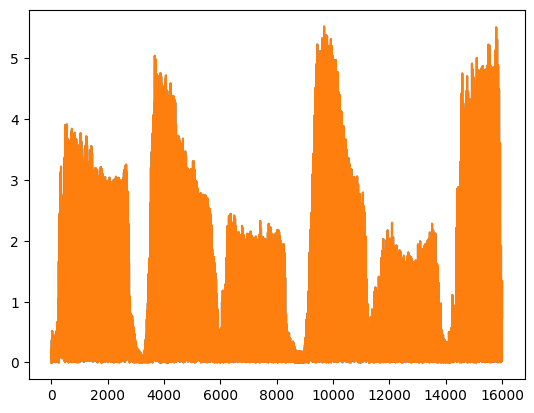

In [90]:
plt.plot(sample_q15_q8_8_revert)
plt.plot(sample_q31_q8_24_revert)
# plt.plot(sample_q8_24)

In [114]:
# Q 8.24 Multiply
mult_sample_q15_q8_8 = cmsisdsp.arm_mult_q15(sample_q15_q8_8, sample_q15_q8_8) << 7
mult_sample_q31_q8_24 = cmsisdsp.arm_mult_q31(sample_q31_q8_24, sample_q31_q8_24) << 7
mult_sample_q8_24_result = sample_q8_24 * sample_q8_24

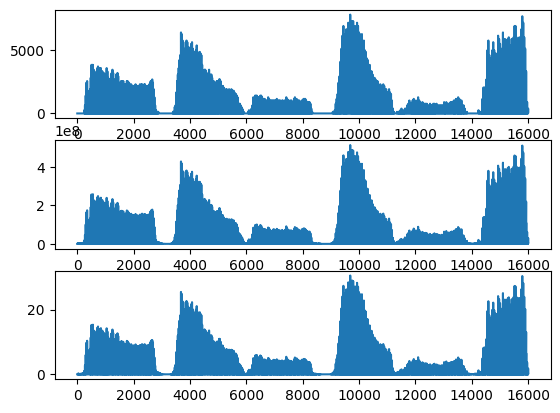

In [115]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
ax0.plot(mult_sample_q15_q8_8)
ax1.plot(mult_sample_q31_q8_24)
ax2.plot(mult_sample_q8_24_result)

In [117]:
mult_sample_q15_q8_8_result = cmsisdsp.arm_q15_to_float(mult_sample_q15_q8_8) * 2**7
mult_sample_q31_q8_24_result = cmsisdsp.arm_q31_to_float(mult_sample_q31_q8_24) * 2**7

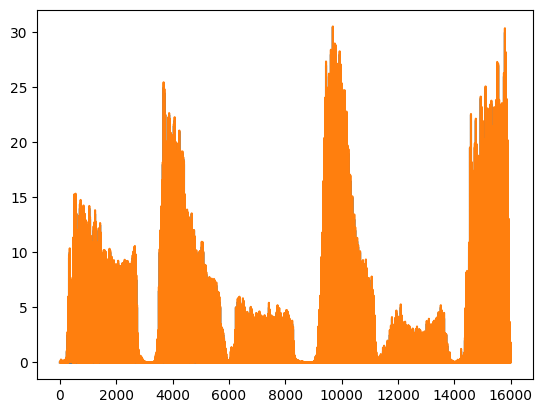

In [121]:
plt.plot(mult_sample_q15_q8_8_result)
# plt.plot(mult_sample_q31_q8_24_result)
plt.plot(mult_sample_q8_24_result)

In [ ]:
# Q8.24 * Q8.24 -> Q 16.48 -> Q 16.16
# Q8.24 * Q1.31 -> Q  8.56 -> Q  8.24